Lets change the Loughran-McDonald Master Dictionary lexicon to be easily applied in our given context, binary sentiment analysis.

In [1]:
import pandas as pd

lexicon = pd.read_csv("Loughran-McDonald_MasterDictionary_1993-2023.csv")

# keep only sentiment-related features

columns_to_keep = ["Word", "Negative", "Positive", "Uncertainty", "Litigious"]
lexicon = lexicon[columns_to_keep]
lexicon.head(), lexicon.shape

(        Word  Negative  Positive  Uncertainty  Litigious
 0   AARDVARK         0         0            0          0
 1  AARDVARKS         0         0            0          0
 2      ABACI         0         0            0          0
 3      ABACK         0         0            0          0
 4     ABACUS         0         0            0          0,
 (86553, 5))

In [2]:
# remove rows where sentiment columns have no values
lexicon = lexicon[
    (lexicon[["Negative", "Positive", "Uncertainty", "Litigious"]] != 0).any(axis=1)
]
lexicon.shape

(3716, 5)

Based on the documentation, this is how sentiment works in this lexicon:

`"each sentiment category (previously discussed) has a column. If a
word is included in the sentiment category, the year/version when it was included
is indicated. Note that if the year is preceded by a negative sign, this flag indicates
the year when the word was removed from the sentiment category."`([source](https://drive.google.com/file/d/1qMZ4WTDv9bq2iYOxmMP5h_JgdLb46z_h/view))

So to simplify, lets keep just the positive and negative columns, and a binary flag indicator of sentiment, if a word is, or swapped categories to other than positive, lets keep it negative.

In [3]:
def process_lexicon_row(row):
    if row["Positive"] != 0:
        row["Positive"] = 1
    if row["Negative"] != 0:
        row["Negative"] = 1

    if row["Negative"] == 0:
        if row["Uncertainty"] != 0 and row["Positive"] == 0:
            row["Negative"] = 1
        elif row["Litigious"] != 0 and row["Positive"] == 0:
            row["Negative"] = 1
    return row

lexicon = lexicon.apply(process_lexicon_row, axis=1)
lexicon = lexicon.iloc[:, :-2]
lexicon["Sentiment"] = lexicon["Positive"].apply(lambda x: 1 if x != 0 else 0)
lexicon = lexicon.drop(["Positive", "Negative"], axis=1)
lexicon["Word"] = lexicon["Word"].str.lower()
lexicon.head()

,Word,Sentiment
9,abandon,0
10,abandoned,0
11,abandoning,0
12,abandonment,0
13,abandonments,0


In [4]:
lexicon.to_csv("loughran-mcdonald-lexicon.csv", index=False)

Class Distribution:
Sentiment
0    3362
1     354
Name: count, dtype: int64


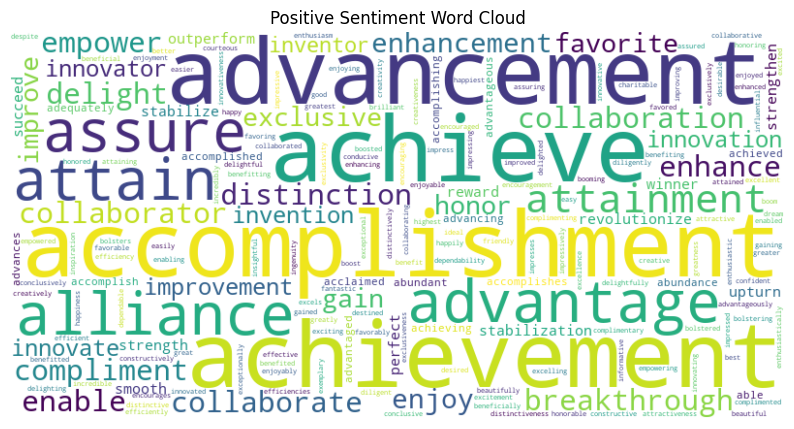

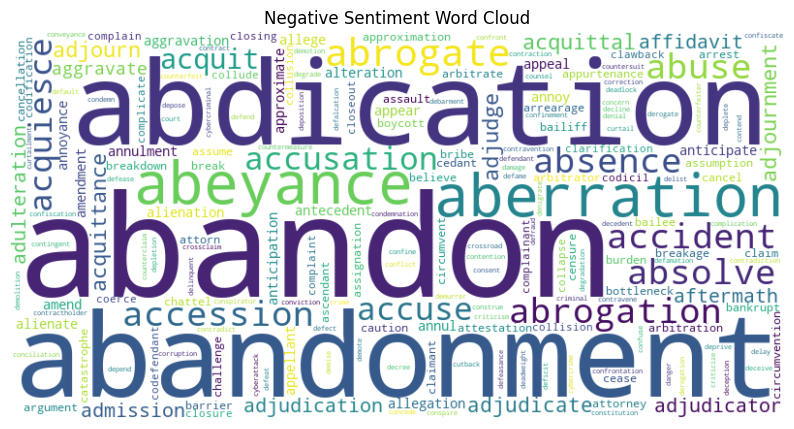

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_lexicon = lexicon[lexicon["Sentiment"] == 1]
negative_lexicon = lexicon[lexicon["Sentiment"] == 0]

class_distribution = lexicon["Sentiment"].value_counts()
print("Class Distribution:")
print(class_distribution)


def generate_wordcloud(words, title):
    all_words = " ".join(words["Word"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
        all_words
    )
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.show()


generate_wordcloud(positive_lexicon, "Positive Sentiment Word Cloud")
generate_wordcloud(negative_lexicon, "Negative Sentiment Word Cloud")